## Testing Assumptions of Linear Regression.

### The very first step after building a linear regression model is to check whether the model meets the assumptions of linear regression. If assumptions are not met, then the conclusions from our analysis will not be valid. Violation of this assumption is very serious–it means that your linear model probably does a bad job at predicting your actual (non-linear) data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("data.csv")
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [9]:
X= df.iloc[:,0:3].values
y= df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)


In [11]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred= model.predict(X_test)
residual= y_test- y_pred


### 1. Linear Relationship: The data should have linear relationship, The X features and target feature should have linear relationship.
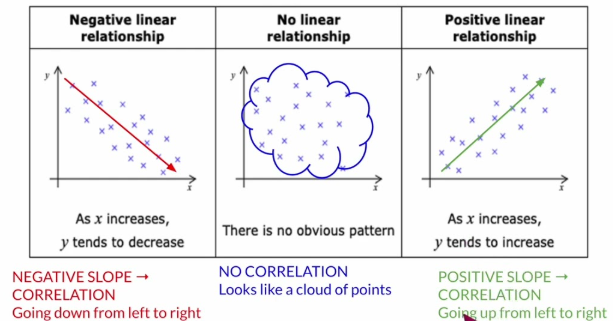

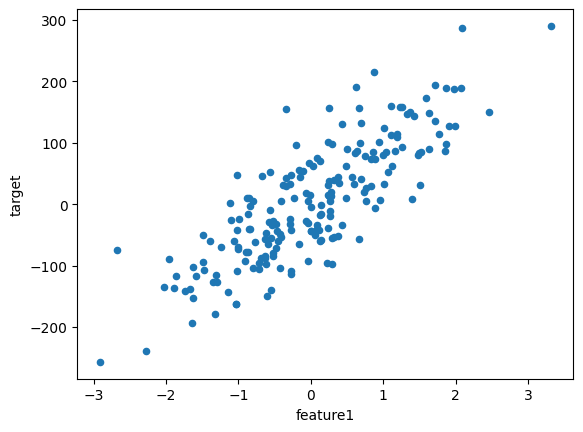

In [21]:
df.plot(kind='scatter', x= 'feature1', y= 'target')
plt.show()

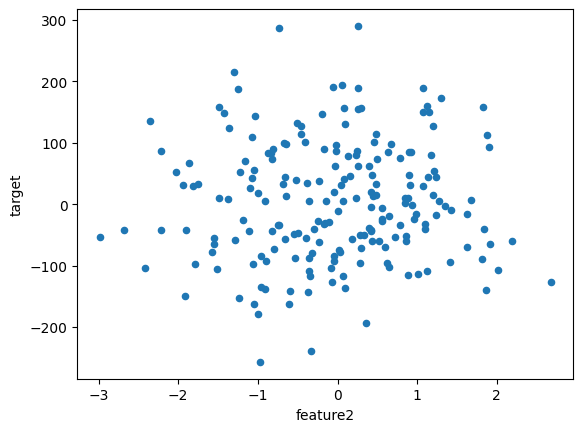

In [22]:
df.plot(kind='scatter', x='feature2', y='target')
plt.show()

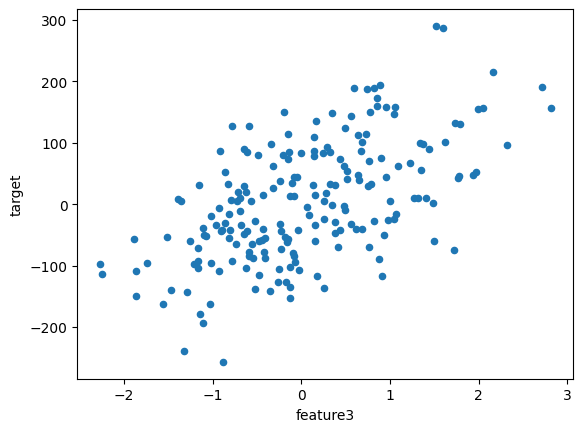

In [23]:
df.plot(kind='scatter', x='feature3', y='target')
plt.show()

### Feature 1 and 3 are Linear, we are not sure about feature 2.

## 2. No Multicollinearity: All input features should be independent of each other. If there is any correlation between them, then it means there is multicollinearity.

### Y= Bo+ B1.x1 + B2.x2+ B3.x3

B1, B2, B3- represent the amount of changes in x1 that will result in amount of change in y, given x2, x3 are constant.

#### Ex: If 2 scientist are from different fields we can easily guage their contribution to the outcome, but if they have same expertise or are from same field then it is difficult to guage their contributions, similarly if the features are correalted then we cannot guage their effect on target. The model can’t tell which feature is actually influencing the target


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train, i))

In [26]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3])

,vif
feature1,1.010326
feature2,1.009871
feature3,1.013950


#### VIF is a widely used diagnostic tool in regression analysis to detect multicollinearity. It checks how much one feature is explained by all the others.
#### If the VIF's are around 1 we do not have multi collinearity. If results are around the range of 5 then we have multicollinearity.

If a feature is not correlated with other features, VIF will be close to 1

If it’s kind of correlated, VIF might be between 2 and 5

If it’s super correlated, VIF will be >10 (bad news)

## In order to really tell the right story, VIF is always calculated for each predictor in a model.
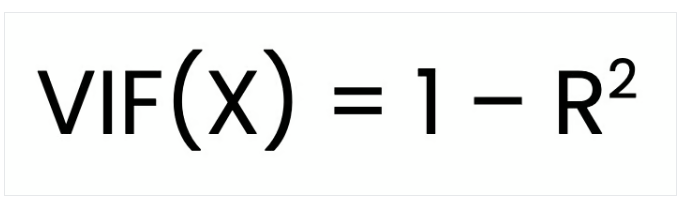

#### Finding VIF is a three-step process. The first step is to fit a separate linear regression model for each predictor against all other predictors. The second step is to obtain the R2 value for each model. The final step is to calculate VIF using the formula above.

### Alternatevly we can check for correlation between features. But checking using VIF is recommended.

<Axes: >

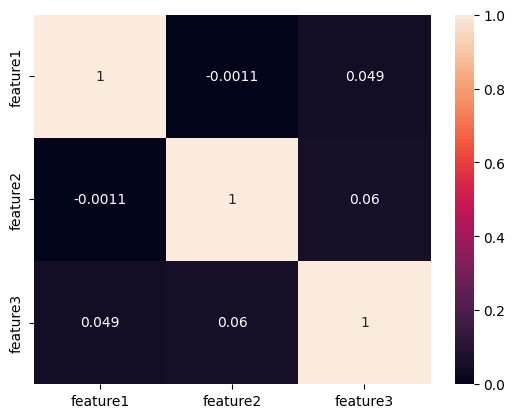

In [28]:
sns.heatmap(df.iloc[:, 0:3].corr(), annot=True)

## 3. Normal Residual:
The residuals when plotted should have a normal distribution. The residual is the difference between actual and predicted target value. We can use KDE or QQ plot for this

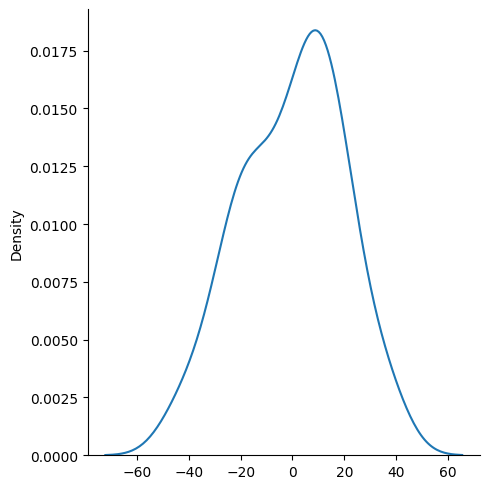

In [31]:
sns.displot(residual, kind='kde')

## Even though it has a bump, it is fairy normal distribution.

### 4. Homoscedasticity:
####Homo- same,
####scedasticity- spread, or scatter,
####i.e having same scatter,

#### When we plot the residuals their spead should be equal.
#### X axis- Y_pred
#### y axis- Residual

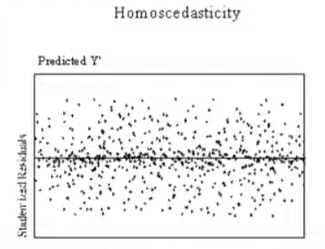

####Heteroscedasticity

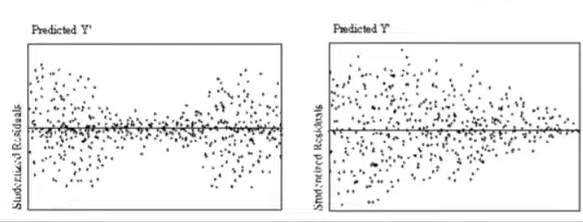

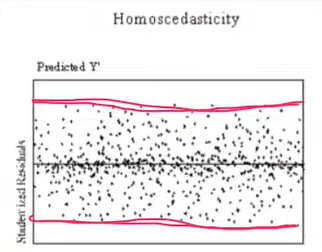

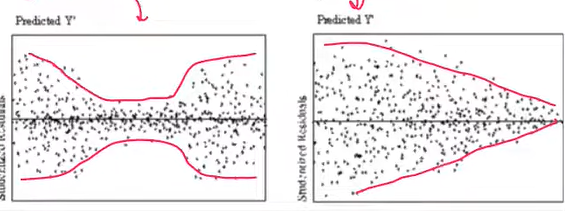

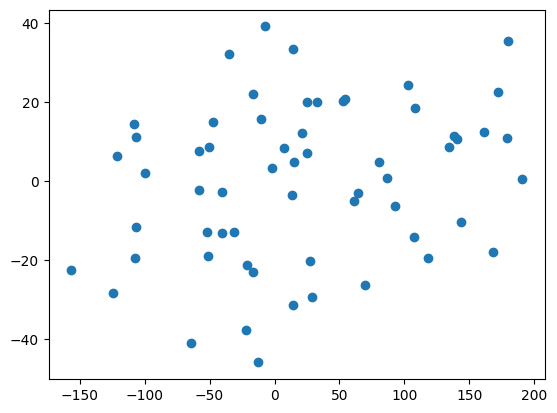

In [32]:
plt.scatter(y_pred, residual)

### The spread looks to be uniform

# 5. No autocorreation of Error:
When we plot the residual,no plattern should be formed. Patterns are not desireable.
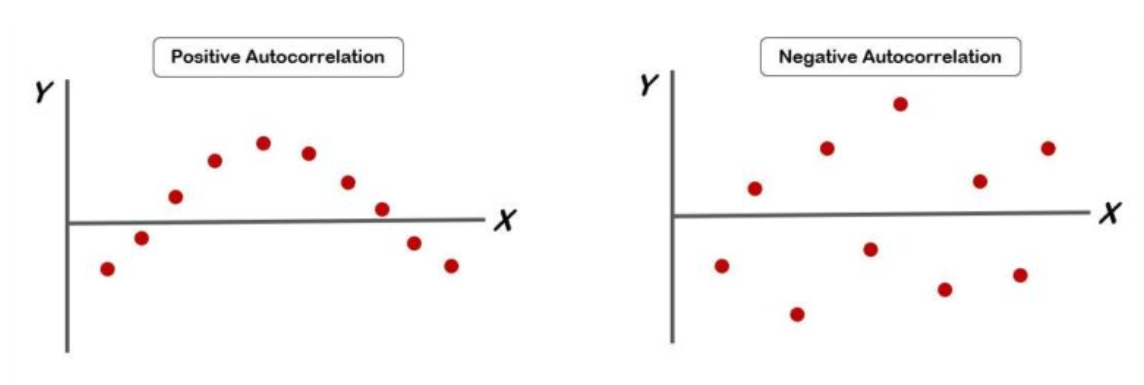

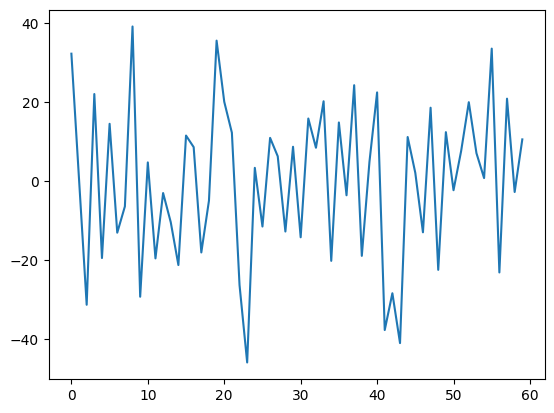

In [33]:
plt.plot(residual)